# Fiscal and Trade

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
from matplotlib.dates import DayLocator, MonthLocator, DateFormatter
from matplotlib.ticker import AutoMinorLocator, MultipleLocator

# path for the folder "project"
path = "C:\\Users\\pedro\\OneDrive\\NYU\\CSS\\II. Data Skills\\project"
os.chdir(path)

# importing aux functions (see charts_inflation.ipynb for more details)
import functions as fn

plt.style.use('seaborn-bright')
plt.rcParams['figure.dpi'] = 200 # high quality figure.
%matplotlib inline

## Importing Data

In [2]:
# Trade
trade = pd.read_parquet("data\\fiscal_trade\\data_census_ftd.parquet")
usd = pd.read_parquet("data\\fiscal_trade\\data_fred_usd.parquet")

# Fiscal
fiscal = pd.read_parquet("data\\fiscal_trade\\data_fred_government_accounts.parquet")

### Trade

In [3]:
trade.head()

,series_id,date,value,category_name,data_type_name
63,FTDEXPBOPGSSAUS,1992-01-01,50251,Balance of Payment Goods and Services,Exports
64,FTDIMPBOPGSSAUS,1992-01-01,52277,Balance of Payment Goods and Services,Imports
65,FTDBALBOPGSSAUS,1992-01-01,-2026,Balance of Payment Goods and Services,Balance
62,FTDBALBOPGSSAUS,1992-02-01,-831,Balance of Payment Goods and Services,Balance
69,FTDEXPBOPGSSAUS,1992-02-01,51682,Balance of Payment Goods and Services,Exports


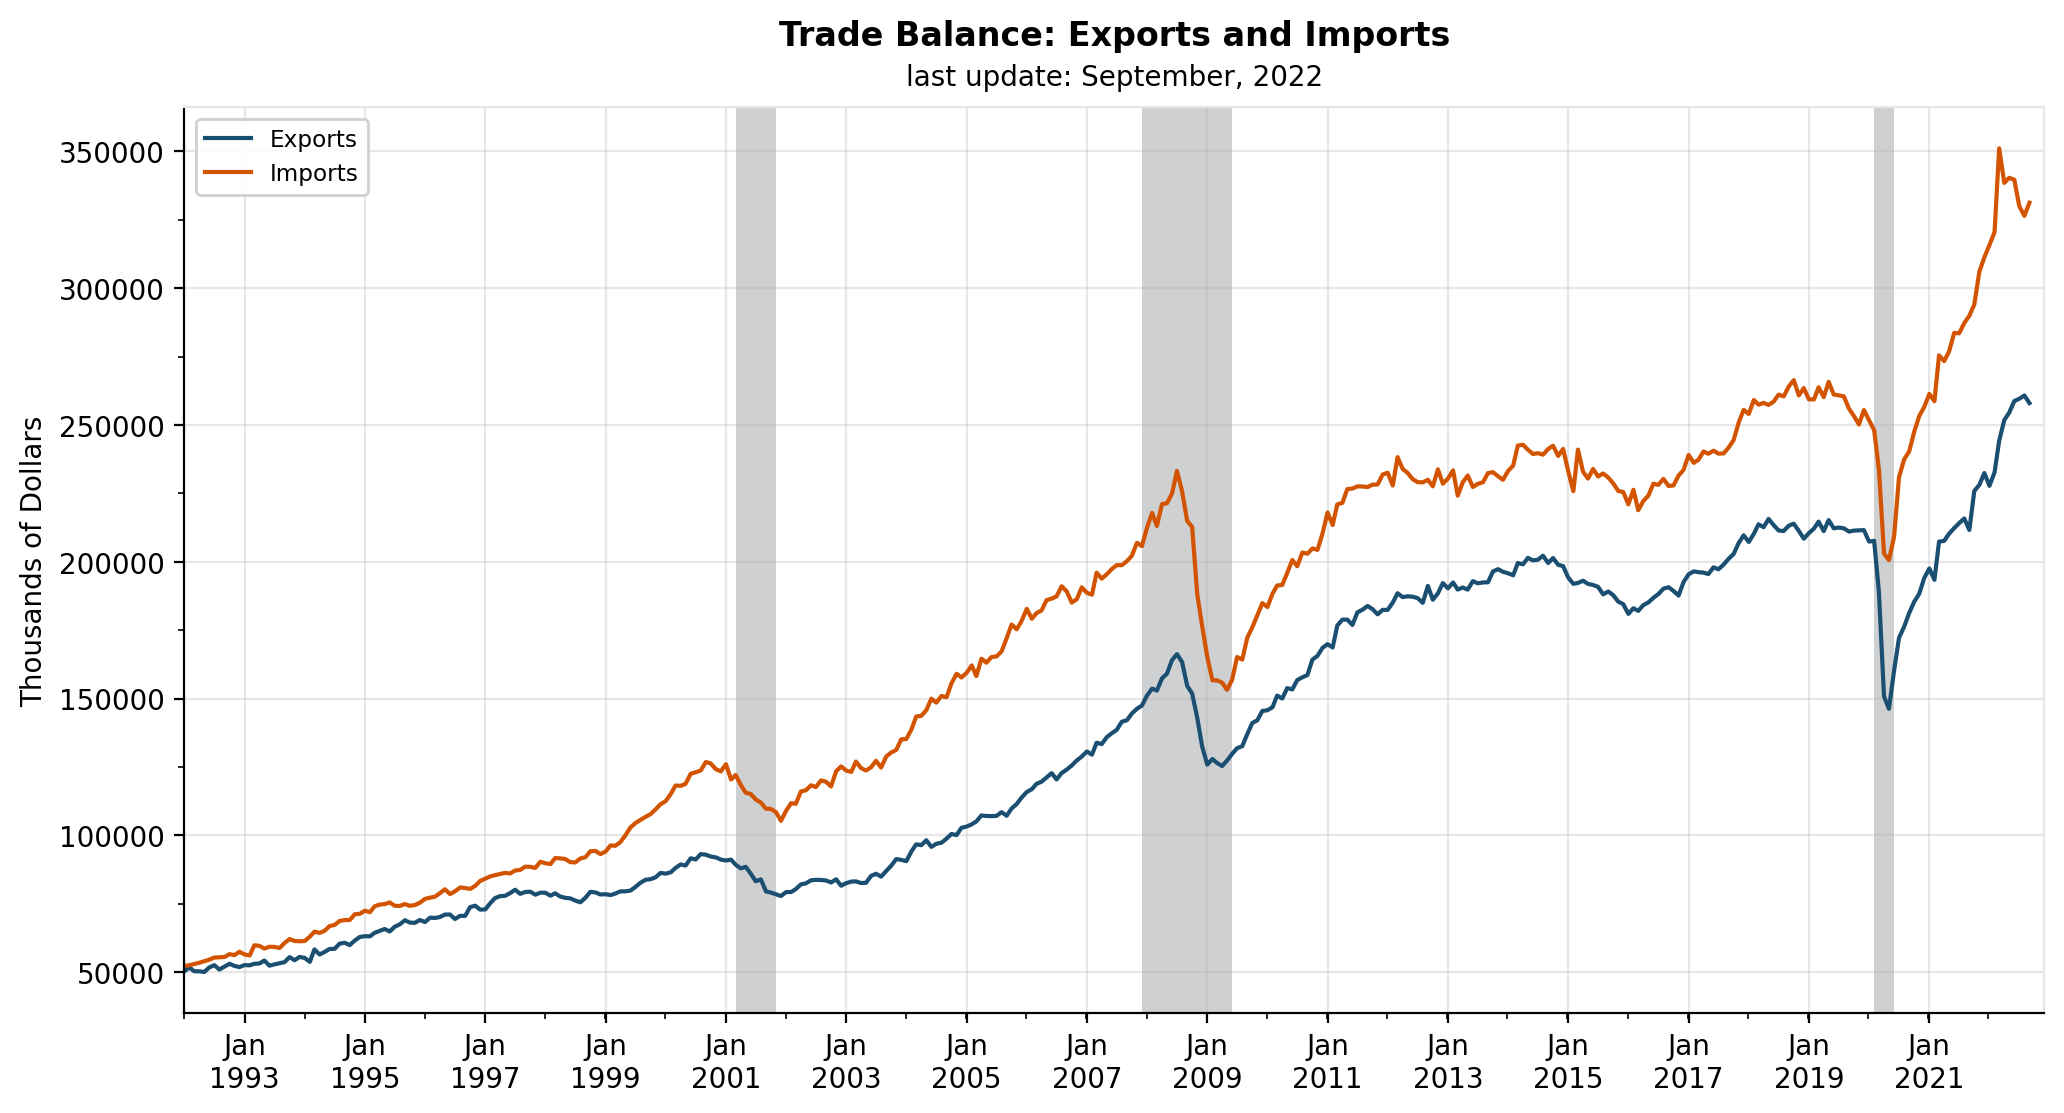

In [4]:
# Exports and Imports
data = (
    trade[trade["series_id"].isin(["FTDEXPBOPGSSAUS","FTDIMPBOPGSSAUS"])]
    .copy()
    .replace(["FTDEXPBOPGSSAUS","FTDIMPBOPGSSAUS"],["Exports","Imports"])
)

# chart:
plt.rcParams['figure.dpi'] = 200 # high quality figure.

# creating the df to map chart configuration:
df_code = pd.DataFrame({
    'series_id': ["Exports","Imports"],
    'hue': [fn.colors[0],fn.colors[1]],
    'alpha':[1,1],
    'annotation':[False,False]})

# running function
fig, ax = fn.ts_plot(df = data[["series_id","date","value"]],
                     df_map = df_code,
                     start_date = "1992-01-01",
                     title ='Trade Balance: Exports and Imports',
                     ylab='Thousands of Dollars',
                     fig_size = (12,6), legend_loc = "upper left",
                     plot_recession = True, hline = False, hline_loc = 0,
                     xmargin = 0.00, ymargin = 0.05,
                     y_major_loc = 50000, y_minor_loc = 2,
                     x_major_loc = 24, x_minor_loc = 2, x_format = "%b\n%Y", n=90)

plt.show()

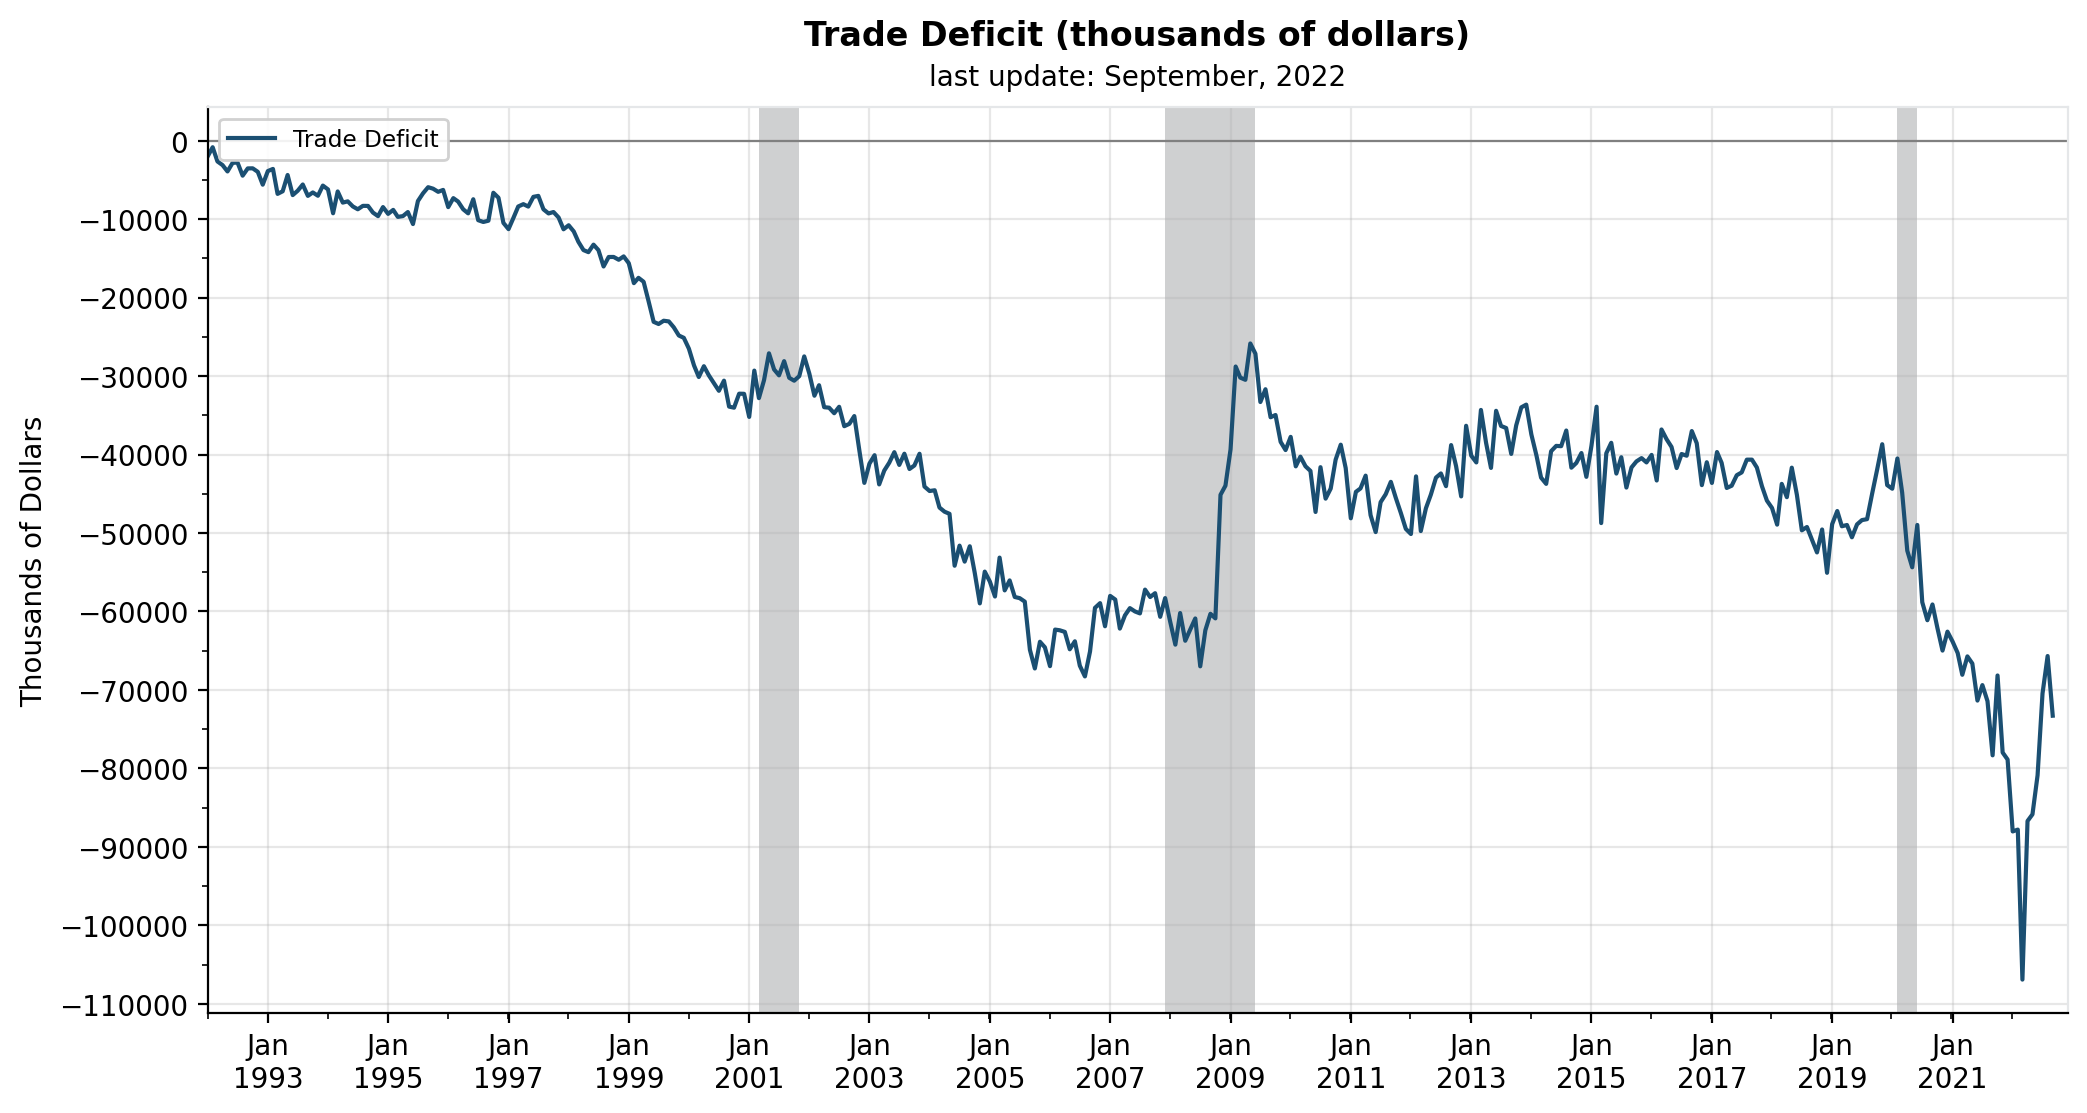

In [5]:
# trade deficit
data = (
    trade[trade["series_id"].isin(["FTDBALBOPGSSAUS"])]
    .copy()
    .replace(["FTDBALBOPGSSAUS"],["Trade Deficit"])
)

# chart:
plt.rcParams['figure.dpi'] = 200 # high quality figure.

# creating the df to map chart configuration:
df_code = pd.DataFrame({
    'series_id': ["Trade Deficit"],
    'hue': [fn.colors[0]],
    'alpha':[1],
    'annotation':[False]})

# running function
fig, ax = fn.ts_plot(df = data[["series_id","date","value"]],
                     df_map = df_code,
                     start_date = "1992-01-01",
                     title ='Trade Deficit (thousands of dollars)',
                     ylab='Thousands of Dollars',
                     fig_size = (12,6), legend_loc = "upper left",
                     plot_recession = True, hline = True, hline_loc = 0,
                     xmargin = 0.00, ymargin = 0.04,
                     y_major_loc = 10000, y_minor_loc = 2,
                     x_major_loc = 24, x_minor_loc = 2, x_format = "%b\n%Y", n=90)

plt.show()

In [6]:
usd.head()

,series_id,date,value,series_name,unit,seasonal
0,DTWEXBGS,2006-01-02,101.4155,Nominal Broad U.S. Dollar Index,Index,U
1,DTWEXBGS,2006-01-03,100.7558,Nominal Broad U.S. Dollar Index,Index,U
2,DTWEXBGS,2006-01-04,100.2288,Nominal Broad U.S. Dollar Index,Index,U
3,DTWEXBGS,2006-01-05,100.2992,Nominal Broad U.S. Dollar Index,Index,U
4,DTWEXBGS,2006-01-06,100.0241,Nominal Broad U.S. Dollar Index,Index,U


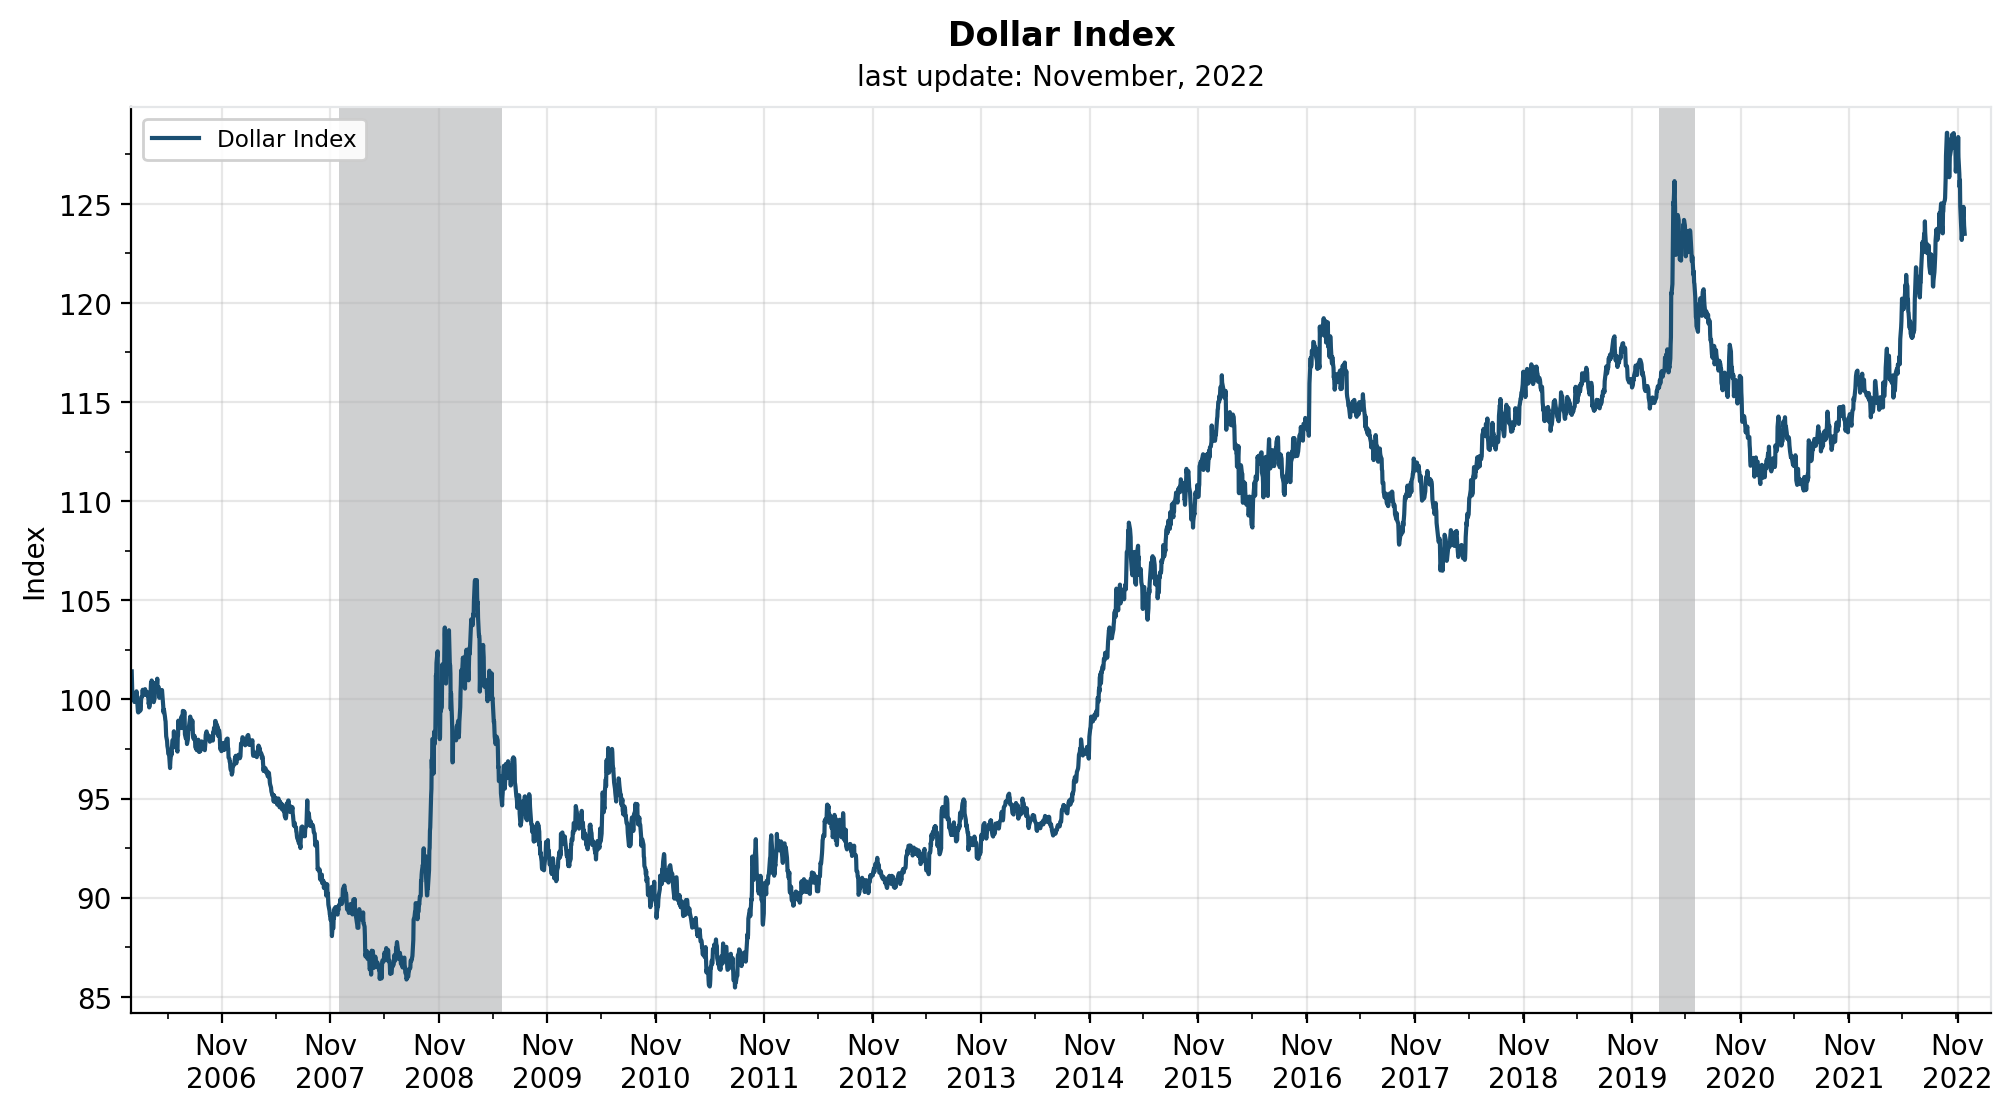

In [7]:
# trade deficit
data = (
    usd[usd["series_id"].isin(["DTWEXBGS"])]
    .copy()
    .replace(["DTWEXBGS"],["Dollar Index"])
)

# chart:
plt.rcParams['figure.dpi'] = 200 # high quality figure.

# creating the df to map chart configuration:
df_code = pd.DataFrame({
    'series_id': ["Dollar Index"],
    'hue': [fn.colors[0]],
    'alpha':[1],
    'annotation':[False]})

# running function
fig, ax = fn.ts_plot(df = data[["series_id","date","value"]],
                     df_map = df_code,
                     start_date = "2006-01-01",
                     title ='Dollar Index',
                     ylab='Index',
                     fig_size = (12,6), legend_loc = "upper left",
                     plot_recession = True, hline = False, hline_loc = 0,
                     xmargin = 0.00, ymargin = 0.03,
                     y_major_loc = 5, y_minor_loc = 2,
                     x_major_loc = 12, x_minor_loc = 2, x_format = "%b\n%Y", n=90)

plt.show()

### Fiscal

In [8]:
fiscal.head()
#MTSO133FMS Total Federal Outlays
#MTSR133FMS Total Federal Receipts

,series_id,date,value,series_name,unit,seasonal
0,MTSO133FMS,1980-10-01,55843.0,Total Federal Outlays,Millions of Dollars,U
1,MTSO133FMS,1980-11-01,48083.0,Total Federal Outlays,Millions of Dollars,U
2,MTSO133FMS,1980-12-01,50869.0,Total Federal Outlays,Millions of Dollars,U
3,MTSO133FMS,1981-01-01,63339.0,Total Federal Outlays,Millions of Dollars,U
4,MTSO133FMS,1981-02-01,53749.0,Total Federal Outlays,Millions of Dollars,U


In [9]:
data = (
    fiscal[fiscal["series_id"].isin(["MTSO133FMS","MTSR133FMS"])]
    .copy()
    .replace(["MTSO133FMS","MTSR133FMS"],["Total Federal Outlays","Total Federal Receipts"])
)

data_ma = (data
           .copy()
           .sort_values("date")
           .set_index("date")
           .groupby("series_id")["value"]
           .rolling(12)
           .sum()
           .dropna()
           .reset_index())
data_ma.head()

,series_id,date,value
0,Total Federal Outlays,1981-09-01,657204.0
1,Total Federal Outlays,1981-10-01,664934.0
2,Total Federal Outlays,1981-11-01,671810.0
3,Total Federal Outlays,1981-12-01,697816.0
4,Total Federal Outlays,1982-01-01,680407.0


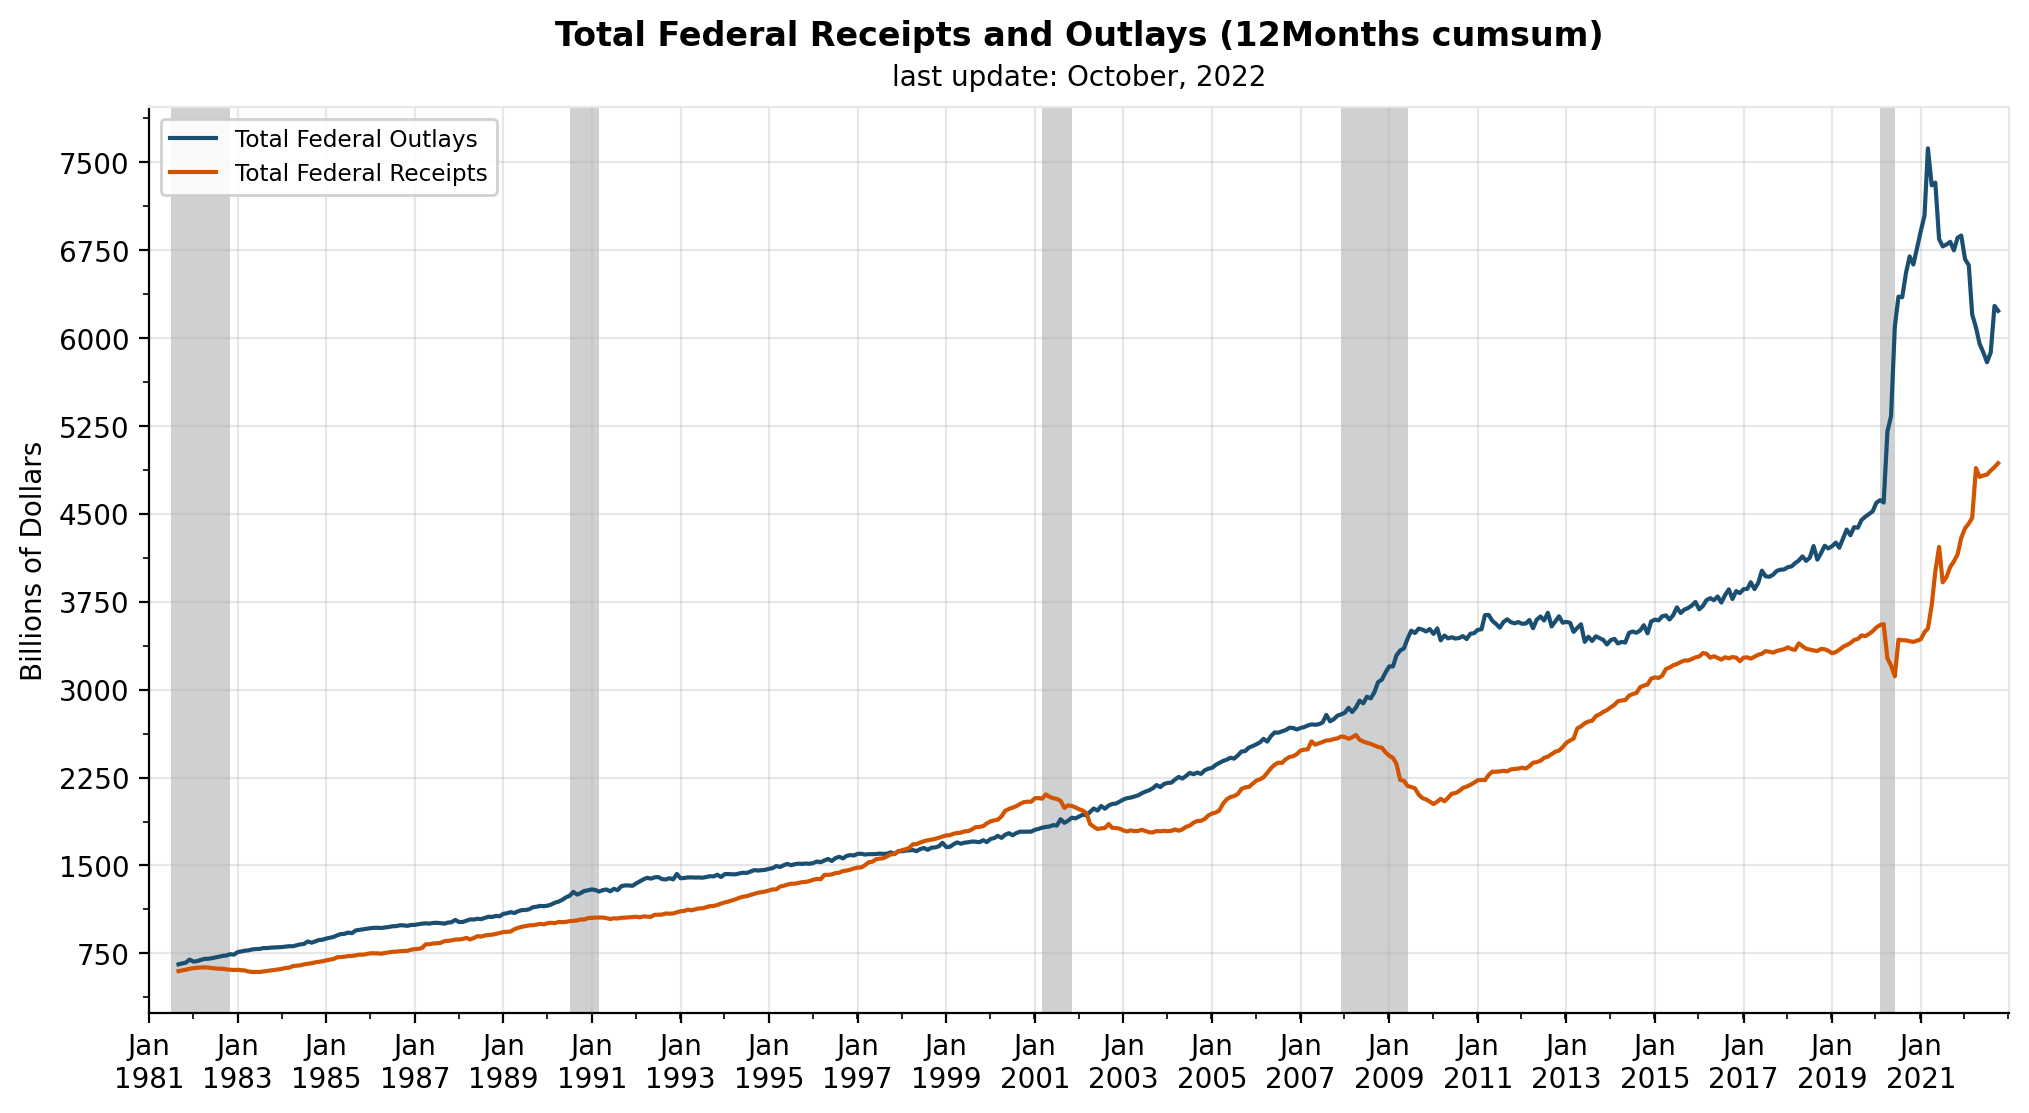

In [10]:
# Exports and Imports
data = (
    fiscal[fiscal["series_id"].isin(["MTSO133FMS","MTSR133FMS"])]
    .copy()
    .replace(["MTSO133FMS","MTSR133FMS"],["Total Federal Outlays","Total Federal Receipts"])
)

data_ma = (data
           .copy()
           .sort_values("date")
           .set_index("date")
           .groupby("series_id")["value"]
           .rolling(12)
           .sum()
           .dropna()
           .reset_index())

data_ma["value"] = data_ma["value"]/1000

# chart:
plt.rcParams['figure.dpi'] = 200 # high quality figure.

# creating the df to map chart configuration:
df_code = pd.DataFrame({
    'series_id': ["Total Federal Outlays","Total Federal Receipts"],
    'hue': [fn.colors[0],fn.colors[1]],
    'alpha':[1,1],
    'annotation':[False,False]})

# running function
fig, ax = fn.ts_plot(df = data_ma[["series_id","date","value"]],
                     df_map = df_code,
                     start_date = "1981-01-01",
                     title ='Total Federal Receipts and Outlays (12Months cumsum)',
                     ylab='Billions of Dollars',
                     fig_size = (12,6), legend_loc = "upper left",
                     plot_recession = True, hline = False, hline_loc = 0,
                     xmargin = 0.00, ymargin = 0.05,
                     y_major_loc = 750, y_minor_loc = 2,
                     x_major_loc = 24, x_minor_loc = 2, x_format = "%b\n%Y", n=90)

plt.show()